# Volkswagen Polo Sales analysis

## Data import

In [35]:
# import all csv files from /csv folder
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# current path: C:\Users\javio\Escritorio\apps\cochesNet-sell
# csv files path: C:\Users\javio\Mi unidad\csv

# Import all csv files from /csv folder, need to change the path to the folder where the csv files are stored
os.chdir("C:/Users/javio/Mi unidad/csv")
all_files = [i for i in glob.glob('*.csv')]
print(all_files)
li = []

# create a list with all the datadatas
for filename in all_files:
    df = pd.read_csv(filename, sep = ';')
    li.append(df)

# concatenate all the Dataframes
data = pd.concat(li, axis=0, ignore_index=True)
data['id'] = data['id'].astype(int)

['cochesnet-2024-03-28-12-52-14.csv', 'cochesnet-2024-03-28-12-55-12.csv', 'cochesnet-2024-03-28-12-56-00.csv', 'cochesnet-2024-03-28-13-19-19.csv', 'cochesnet-2024-03-28-17-31-26.csv', 'cochesnet-2024-03-29-05-31-32.csv', 'cochesnet-2024-03-29-17-31-37.csv', 'cochesnet-2024-03-30-05-31-43.csv', 'cochesnet-2024-03-30-17-31-49.csv', 'cochesnet-2024-03-31-05-31-55.csv', 'cochesnet-2024-03-31-17-32-00.csv', 'cochesnet-2024-04-01-05-32-06.csv', 'cochesnet-2024-04-01-17-32-11.csv', 'cochesnet-2024-04-02-05-32-17.csv', 'cochesnet-2024-04-02-17-32-23.csv', 'cochesnet-2024-04-03-05-32-29.csv', 'cochesnet-2024-04-03-17-32-34.csv', 'cochesnet-2024-04-03-18-42-28.csv', 'cochesnet-2024-04-04-06-42-34.csv']


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## General car prices

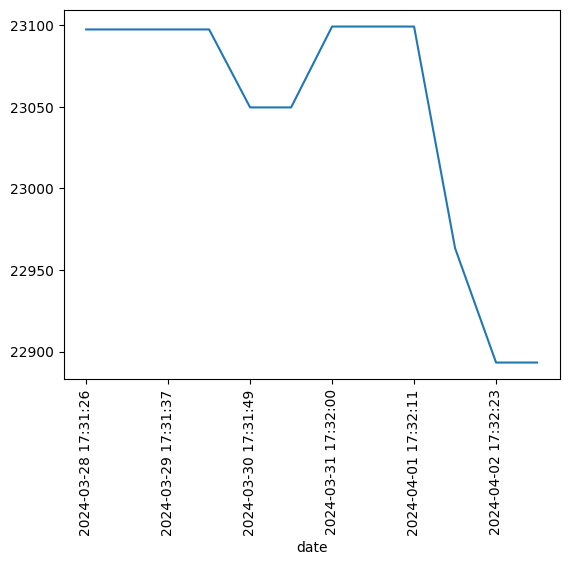

In [19]:
# average price of the cars group by date. plot the result and x axis 90 degrees. x axis only shows the date, not the time
data.groupby('date')['price'].mean().plot()
plt.xticks(rotation=90)
plt.show()

### Cars that have reduced the cost

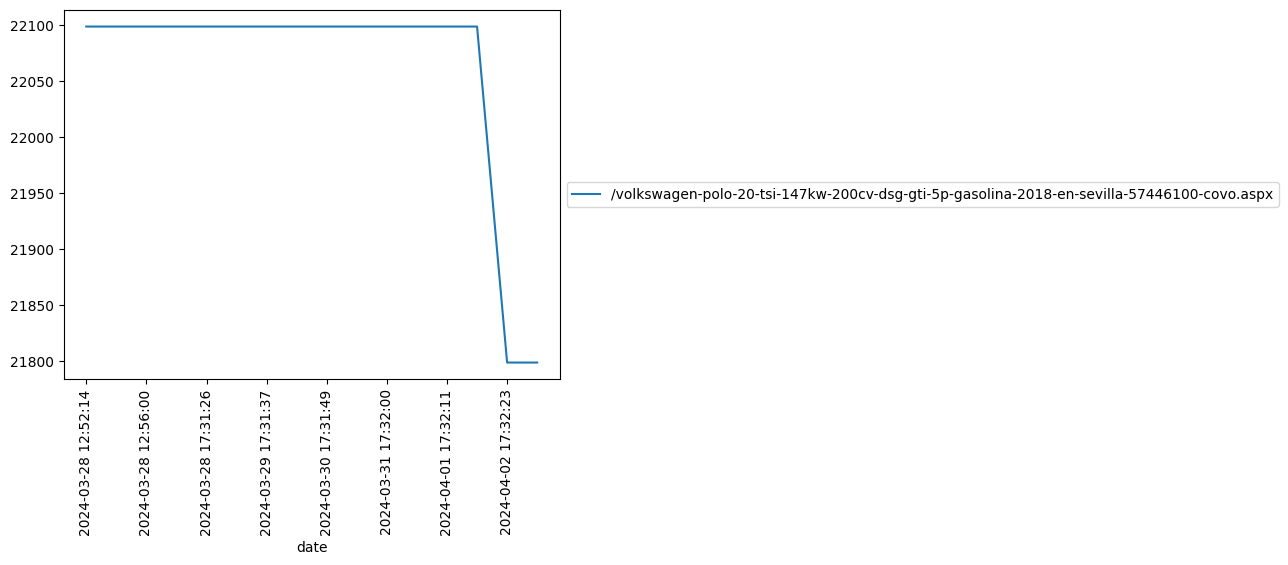

In [ ]:
# group ads by url and count the unique prices. store urls in a list
url_count = data.groupby('url')['price'].nunique()
url_count = url_count[url_count > 1]
url_list = url_count.index.tolist()

# plot the price of the cars with the same url over time
for url in url_list:
    data[data['url'] == url].groupby('date')['price'].mean().plot()
plt.xticks(rotation=90)
plt.legend(url_list, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## All cars price analysis

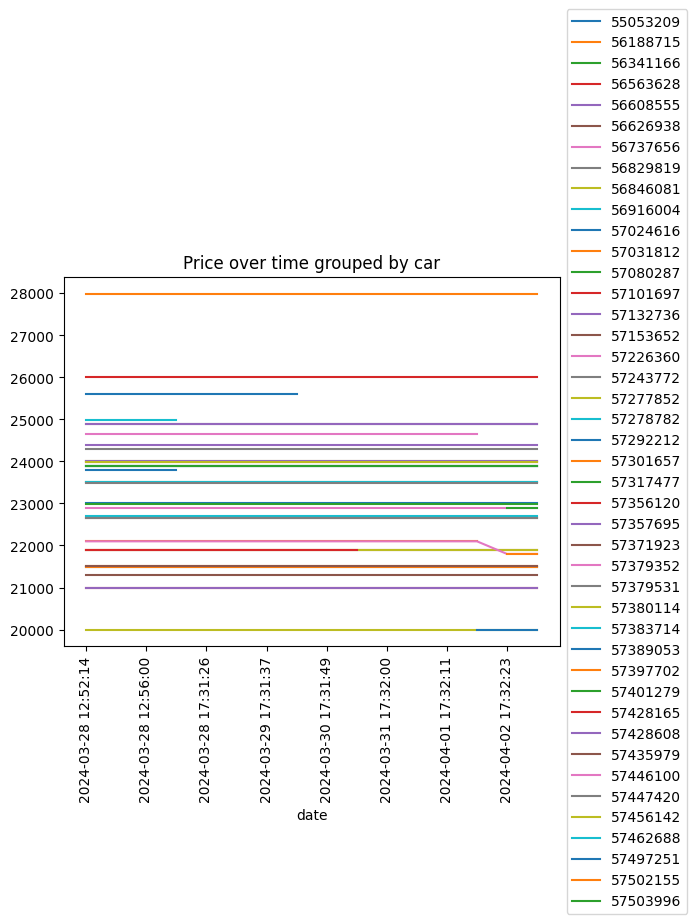

In [ ]:
# plot the price of all the cars over time with a line plot. x axis 90 degrees. each line represents a car
data.groupby(['id', 'date'])['price'].mean().unstack(0).plot()
plt.title('Price over time grouped by car')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

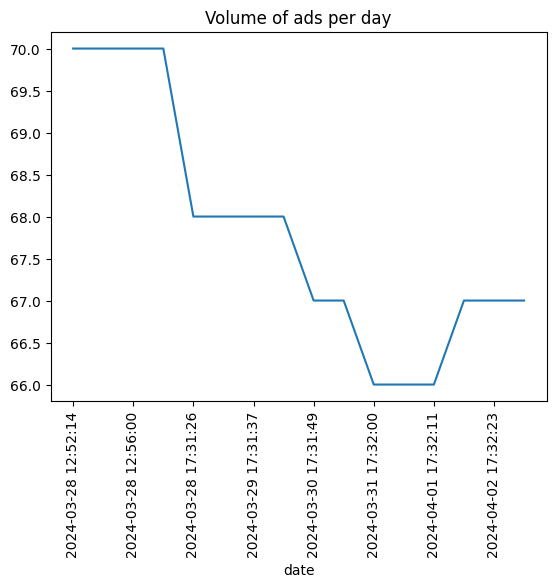

In [ ]:
# number of ads per day
plt.title('Volume of ads per day')
data.groupby('date')['id'].count().plot()
plt.xticks(rotation=90)
plt.show()

## Sales analysis. Sold cars

In [ ]:
# create sales Dataframe
sales = pd.DataFrame()

# current date is the last date of the ads
current_date = data['date'].max()

# get the first and last date of the ad for each car id
first_date = data.groupby('url')['date'].min()
last_date = data.groupby('url')['date'].max()

# add first and last date to the sales Dataframe as datetime objects
sales['first_date'] = pd.to_datetime(first_date)
sales['last_date'] = pd.to_datetime(last_date)
sales = sales.reset_index()

#sales[sold] True is the car is sold, False if the car is still for sale.
# if the last date of the ad is the current date, the car is still for sale
sales['sold'] = sales['last_date'] != current_date

# calculate the difference between the first and last date of the ad for each car id
sales['days-to-sale'] = sales['last_date'] - sales['first_date']
sales['days-to-sale'] = sales['days-to-sale'].dt.days

sales

,url,first_date,last_date,sold,days-to-sale
0,/volkswagen-polo-20-tsi-147kw-200cv-dsg-gti-5p...,2024-03-28 12:52:14,2024-04-02 05:32:17,True,4
1,/volkswagen-polo-20-tsi-147kw-200cv-dsg-gti-5p...,2024-03-28 12:52:14,2024-04-03 05:32:29,False,5
2,/volkswagen-polo-20-tsi-147kw-200cv-dsg-gti-5p...,2024-04-02 17:32:23,2024-04-03 05:32:29,False,0
3,/volkswagen-polo-20-tsi-147kw-200cv-dsg-gti-5p...,2024-03-28 12:52:14,2024-04-03 05:32:29,False,5
4,/volkswagen-polo-20-tsi-147kw-200cv-dsg-gti-5p...,2024-03-28 12:52:14,2024-04-03 05:32:29,False,5
5,/volkswagen-polo-gti-2.0-tsi-147kw-200cv-dsg-5...,2024-03-28 12:52:14,2024-04-03 05:32:29,False,5
6,/volkswagen-polo-gti-2.0-tsi-147kw-200cv-dsg-5...,2024-03-28 12:52:14,2024-04-03 05:32:29,False,5
7,/volkswagen-polo-gti-2.0-tsi-147kw-200cv-dsg-5...,2024-03-28 12:52:14,2024-04-03 05:32:29,False,5
8,/volkswagen-polo-gti-2.0-tsi-147kw-200cv-dsg-5...,2024-03-28 12:52:14,2024-04-03 05:32:29,False,5
9,/volkswagen-polo-gti-2.0-tsi-147kw-200cv-dsg-5...,2024-03-30 17:31:49,2024-04-02 17:32:23,True,3


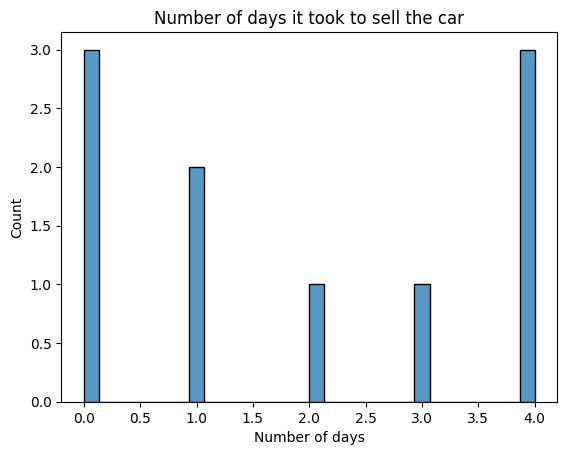

In [ ]:
# plot the number of days it took to sell the car. only cars that are sold
sns.histplot(sales[sales['sold'] == True]['days-to-sale'], bins=30)
plt.xlabel('Number of days')    
plt.title('Number of days it took to sell the car')
plt.show()

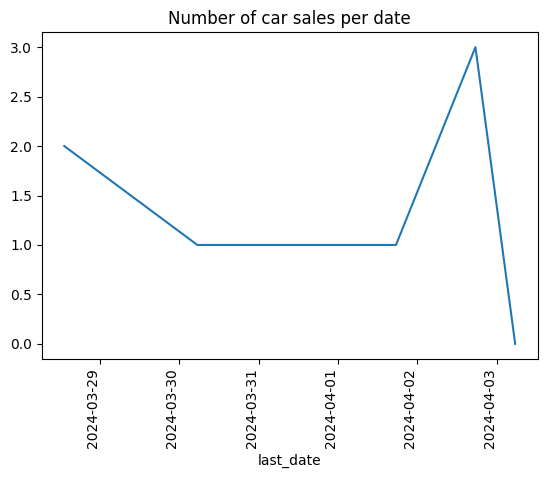

In [ ]:
# number of car sales per date
sales['last_date'] = pd.to_datetime(sales['last_date'])
sales['first_date'] = pd.to_datetime(sales['first_date'])

sales.groupby('last_date')['sold'].sum().plot()
plt.title('Number of car sales per date')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# average price of the cars that are sold
sales = sales.merge(data, left_on='url', right_on='url')

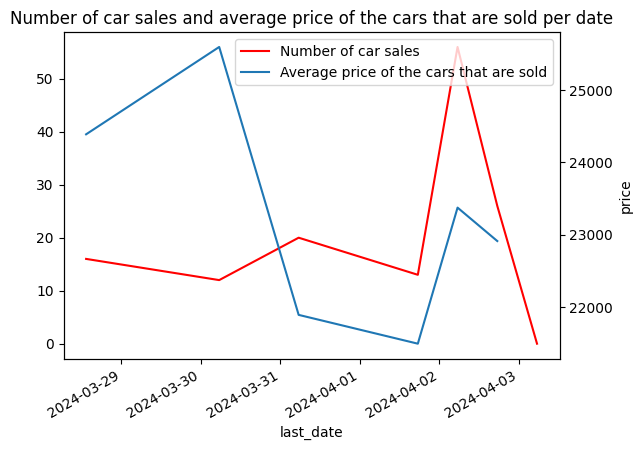

In [ ]:
# double plot. left plot is the number of car sales per date. right plot is the average price of the cars that are sold per date
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sales.groupby('last_date')['sold'].sum().plot(ax=ax1, color='red')
sns.lineplot(data=sales[sales['sold'] == True], x='last_date', y='price', errorbar=None, estimator='mean', ax=ax2)
plt.xticks(rotation=90)
plt.title('Number of car sales and average price of the cars that are sold per date')
plt.legend(handles=[ax1.lines[0], ax2.lines[0]], labels=['Number of car sales', 'Average price of the cars that are sold'])
plt.xticks(rotation=90)
plt.show()